$$\textbf{Assigment 1 - Deep Learning - Christian Møller}$$
$$
\textbf{Part 1:}
$$

In your own words, answer the following questions:
$$
\textit{
a: In your opinion, what were the most important turning points in the history of deep learning?
}
$$

Initially, the development of artificial neural networks (ANNs) in the 1950s laid the theoretical foundation for deep learning. A significant advancement occurred in the 1980s when backpropagation was introduced as an efficient method for training neural networks. The next major turning point came with the development of GPUs in the early 2000s, which drastically accelerated the training process of deep networks. This, coupled with the availability of large-scale datasets (like ImageNet), allowed for the training of deeper networks. The next big moment came in 2012 when AlexNet, a deep convolutional neural network, achieved groundbreaking results in the ImageNet competition, sparking widespread interest in deep learning. Finally, the next big turning point was the large language model chatGPT, which gave the wider population an insight of the strength of deep learning.
$$
\textit{
b: Explain the ADAM optimizer.
}$$

The Adaptive Moment Estimation (ADAM) optimizer uses the moment of previous gradients to steer in the direction of change using a velocity term along with the gradient history to calculate the update step. This way, we use adaptive learning by taking care of the gradient along with a velocity term.
The velocity term:
$$
\begin{equation}
  v_{t} = \gamma v_{t-1} + (1-\gamma)\theta_t\\

\end{equation}
$$
Gradient term, summing up previous gradients:
$$
\begin{equation}
  sum_t = \beta sum_{i-1} + (1-\beta) g_t^2\\
\end{equation}
$$
And finally, the updated learning step:
$$
\begin{equation}
      \theta_t = \theta_{t-1} - \frac{\alpha}{\sqrt{\epsilon + sum_t}} v_t\\
\end{equation}
$$
The user chosen parameters in this optimizer is $\alpha, \beta, \gamma$, which respectively decides the learning rate, gradient effect and velocity effect.

$$
\textit{
c: Assume data input is a single 30x40 pixel image.} \\
\textit{First layer is a convolutional layer with 5 filters, with kernel size 3x2, step size (1,1)}\\
\textit{and padding='valid'. What are the output dimensions?
}$$

Width:
$$ \frac{30-3}{1}+1 = 28$$
Height:
$$\frac{40-2}{1}+1 = 39$$
With 5 filters, the final output dimension would be: $\textbf{5x28x39}$

$$
\textit{
d: Assuming ReLU activations and offsets,} \\
\textit{and that the last layer is softmax,}\\
\textit{ how many parameters does this network have: 
}$$

With 3 hidden layers of 5 neurons, there are 15 biases. Along with this, they are fully connected, giving 75 weights. The output layer is fully connected to the last hidden layer, giving another 15 weights and 3 biases. That gives $$\textbf{total parameters = 15+75+18 = 108}$$

$$
\textit{
e: For a given minibatch, the targets are [1,4, 5, 8]}\\ 
\textit{and the network output is [0.1,4.4,0.2,10].}\\
\textit{If the loss function is "torch.nn.HuberLoss(reduction='mean', delta=1.0)",}\\
\textit{what is the loss for this minibatch?
}$$

With 'a' being the difference between targets and outputs: $a = y-f(x)$, the huber loss is:
$$
L_{\delta}(a) =
\begin{cases} 
\frac{1}{2}a^2, & \text{if } a \leq \delta \\
\delta \cdot (a - \frac{1}{2} \delta), & \text{Otherwise}
\end{cases}
$$
To find the loss for the minibatch, we calculate this for each ouput/target pair and take the mean:
$$
L_{\delta}(0.1, 1) = \frac{1}{2}(0.1 - 1)^2 = 0.405 \\

L_{\delta}(4.4, 4) = \frac{1}{2}(4.4 - 4)^2 = 0.08 \\

L_{\delta}(0.2, 5) = 1 \cdot (|0.2 - 5| - \frac{1}{2} \cdot 1) = 4.3 \\

L_{\delta}(10, 8) = 1 \cdot (|10 - 8| - \frac{1}{2} \cdot 1) = 1.5 \\
$$
Mean loss:
$$
L_{\delta, \text{mean}} = \frac{0.405 + 0.08 + 4.3 + 1.5}{4} = \textbf{1.57125}
$$

$$\textbf{Part 2:}$$
Writing a PyTorch dataset 
The Insects.zip-file contains images of three species of bees. The Insects.csv -file has three columns of which you should focus on the one named "species" and the one named "filename". The "species" column tells the target label of the images listed in the "filename" column.

Your task is to write a PyTorch dataset, which provides image samples together with their target labels.


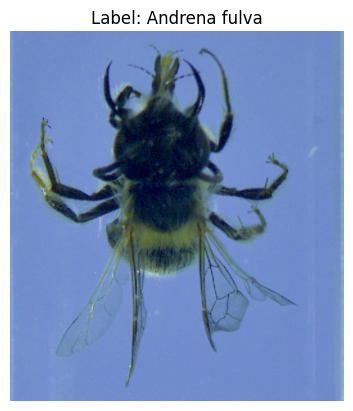

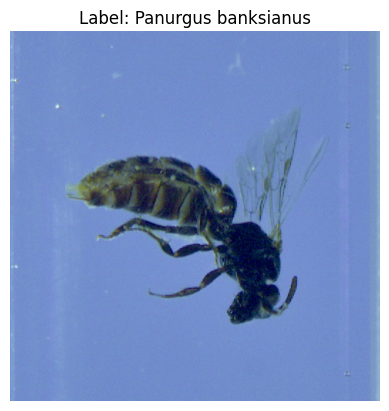

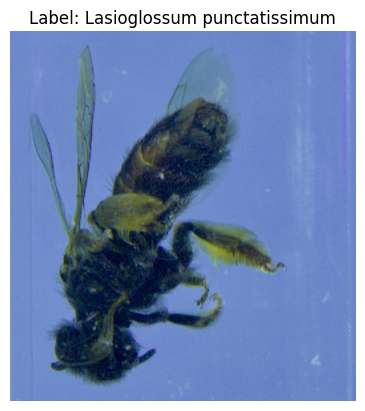

In [5]:
# Part 2 code
import glob
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Image and label function to plot for a given index
def plot_img(dataset, idx):
    image, label = dataset[idx]
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Dataset function
class CustomDataset(Dataset):
    def __init__(self, image_directory, csv_file_path):
        # Loading dataset directory and labels
        # All image paths
        self.image_paths = glob.glob(image_directory + '/*.jpg')
        # All labels from csv
        self.labels = pd.read_csv(csv_file_path)['species'].tolist()
    def __len__(self):
        return len(self.image_paths)
    def __getitem__(self, idx):
        # Image path and label of index
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        # Using cv2 to read and convert to RGB
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        return image, label

#File path definitions
csv_dir = r'C:\1Masters\DeepLearning\insects.csv'
img_dir = r'C:\1Masters\DeepLearning\Insects\Insects'

# Calling dataset
dataset = CustomDataset(image_directory=img_dir, csv_file_path=csv_dir)

# Example print of the three species
plot_img(dataset, 0)
plot_img(dataset, 300)
plot_img(dataset, 600)

$$
\textbf{Part 3}
$$
We supply two datasets, with points drawn from a 2D feature space, and a label assigned to each data point. The data has already been assigned to train and test sets. Each file is a table, where first column is the label, and the 2nd and 3rd columns are the features. This exercise does not require a gpu.

a: describe & visualize the data

b: design a neural network using pytorch to correctly assign labels

Describe your network

Describe your training strategy

Describe your results and discuss the observed performance


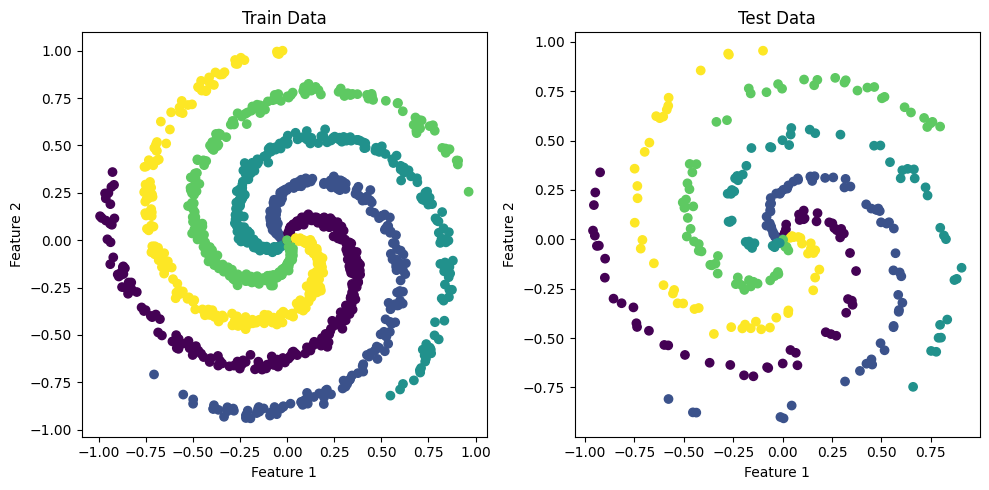

In [19]:
# Part 3.a code. Visualizing data
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
 def __init__(self, csv_file_path):
    # Read file path.
    data = pd.read_csv(csv_file_path, sep=' ')
    # I added column headers in the dataset files in order to handle the columns
    self.labels = data['label']
    self.feature1 = data['feature1']
    self.feature2 = data['feature2']

 def __len__(self):
    # returning length
    return len(self.labels)
 def __getitem__(self, idx):
    feature1 = self.feature1[idx]
    feature2 = self.feature2[idx]
    label = self.labels[idx]
    return label, feature1, feature2

dataset_train = r'C:\1Masters\DeepLearning\trainData.txt'
dataset_test = r'C:\1Masters\DeepLearning\testData.txt'
train_data = CustomDataset(dataset_train)
test_data = CustomDataset(dataset_test)

plt.figure(figsize=(10, 5))

# Training data:
plt.subplot(1, 2, 1)
plt.scatter(train_data.feature1, train_data.feature2, c=train_data.labels)
plt.title('Train Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Test data:
plt.subplot(1, 2, 2)
plt.scatter(test_data.feature1, test_data.feature2, c=test_data.labels)
plt.title('Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()



Description of the data:
The two datasets show a clear spiral created from points based on 2 features, each ranging from -1 to 1. There are 5 labels for each pair of feature 1 and 2, which indicate the color of the coordinate. The dataset contains a total 1500 samples with a 80:20 split between train and test data. The two datasets seem to convey the whole range of interest, which indicates a random split of the test and train data.

Part 3.b

Network description:

The network takes two inputs, which is the features 1 and 2, and the final input is a layer of 5 neurons, representing each color result.
The network has 2 hidden layers, one with 128 neurons and another with 64 neurons.
A ReLU is applied to all layers, and after the final layer, a sigmoid function is applied to concentate the values between 0 and 1, classifying which color is at the given coordinate.

Training strategy:

General strategy is to train the model on the training data. Vary the hyperparameters to get a good model with low loss, and then test the model on the test data.

Since it is a classification problem, the cross entropy loss is used. The chosen optimizer is ADAM, since this is the strongest optimizer shown in class, and seems to be flexible for the problem at hand.
The strategy for the training itself was of course to vary the hyperparameters. Varied parameters were:
Number of epochs. Increased if model was not converged and decreased if model was converged early.
Training loss. Tuned until a convergence was seen.
Topology of network. Network size was increased if training seemed to underfit, and increased if training overfit.
Batch size. Decreased to a number, which gave small enough computational times. Lower batch size increases accuracy at the cost of computational time.

I varied these parameters, and still the model could never give a loss below 0.9. Because of this, a regularization term was added to the ADAM optimizer. Yet no improvement...

C:\Users\Christian Møller\AppData\Local\Temp\ipykernel_20484\889530854.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  feature1 = torch.tensor(feature1)
C:\Users\Christian Møller\AppData\Local\Temp\ipykernel_20484\889530854.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  feature2 = torch.tensor(feature2)
C:\Users\Christian Møller\AppData\Local\Temp\ipykernel_20484\889530854.py:66: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  labels = torch.tensor([int(val[0]) for val in np.array(labels, dtype=str)])
C:\Users\Christian Møller\AppData\Local\Temp\ipykernel_

Average test loss: 0.0595


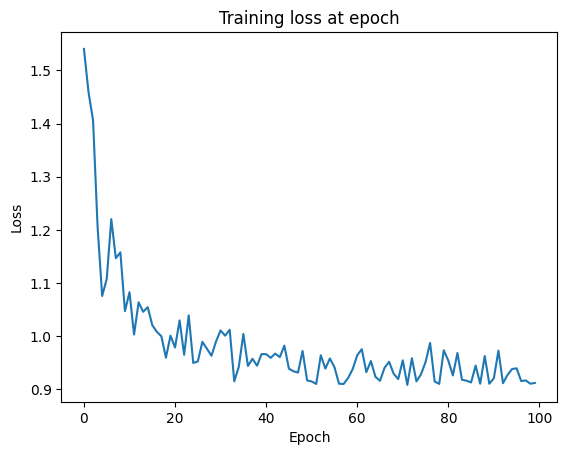

In [53]:
# Part 3.b code
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Defining the neural network module
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Neural network definition. Input is 2 i.e. number of features
        # Final output is dimension 5, which is number of colors.
        # Through testing, the topology is defined
        self.f1 = nn.Linear(2, 128)
        self.relu = nn.ReLU()
        self.f2 = nn.Linear(128, 128)
        self.f3 = nn.Linear(128, 64)
        self.f4 = nn.Linear(64, 5)
    def forward(self, x):
        # Defining the forward feed based on the network
        # Finishing with a sigmoid to get 0 or 1 (classification problem)
        x = self.f1(x)
        x = self.relu(x)
        x = self.f2(x)
        x = self.relu(x)
        x = self.f2(x)
        x = self.relu(x)
        x = self.f3(x)
        x = self.relu(x)
        x = self.f4(x)
        x = F.sigmoid(x)
        return x

# Initialize model and set hyperparameters
model = NeuralNetwork()
batch_size = 16
num_epoch = 100

# Classification problem, so cross entropy loss is used
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)

# Creating data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
loss_saver = []
epoch_saver = []

# Training of model
for epoch in range(num_epoch):
    # Set training mode
    model.train()
    for i, data in enumerate(train_loader, 0):
        # Load data
        labels, feature1, feature2 = data
        
        # Avoiding accumulation with zero grad:
        optimizer.zero_grad()
        
        # Creating tensors and changing to dim 1
        feature1 = torch.tensor(feature1)
        feature2 = torch.tensor(feature2)
        inputs = torch.stack((feature1, feature2), dim=1).float()
        outputs = model(inputs)
        
        # Converting labels to indices
        labels = torch.tensor([int(val[0]) for val in np.array(labels, dtype=str)])
        # Calculating loss
        loss = criterion(outputs, labels)
        
        # Backpropagation
        loss.backward()
        # Optimization
        optimizer.step()
    #Save current loss and epoch for plotting
    loss_saver.append(loss.item())
    epoch_saver.append(epoch)

# Testing
model.eval()
total_loss = 0.0
total_samples = 0

with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        # Load data
        labels, feature1, feature2 = data
        
        # Changing torch tensors to dim 1
        inputs = torch.stack((feature1, feature2), dim=1).float()
        outputs = model(inputs)
        
        # Converting labels to indices
        labels = torch.tensor([int(val[0]) for val in np.array(labels, dtype=str)])
        
        #Calculate loss
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        total_samples += labels.size(0)

# Calculate the average test loss
average_test_loss = total_loss / total_samples
print(f'Average test loss: {average_test_loss:.4f}')

# Training loss plot

plt.plot(epoch_saver, loss_saver)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss at epoch')
plt.show()


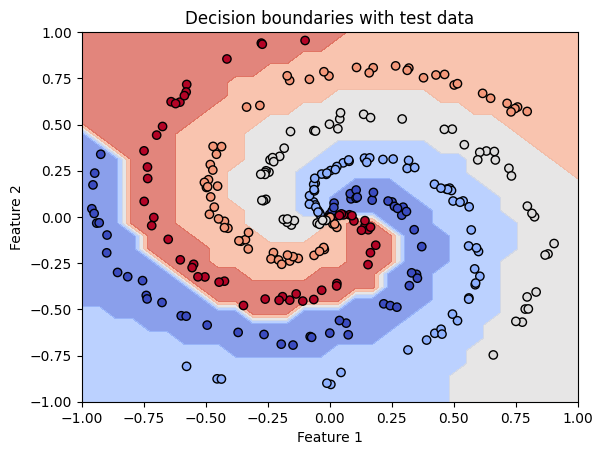

In [54]:
# Visualizing the decision boundaries on top of test data

x, y = np.meshgrid(np.linspace(-1, 1, 30), np.linspace(-1, 1, 30))
xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
z = model(torch.tensor(xy).float()).detach().numpy()
z = np.argmax(z, axis=1).reshape(30, 30)
plt.contourf(x, y, z, levels=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], cmap='coolwarm', alpha=0.7)
testX = np.array(test_data.feature1)
testY = np.array(test_data.feature2)
testLabels = np.array(test_data.labels)
plt.scatter(testX, testY, c=testLabels, cmap='coolwarm', marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision boundaries with test data')
plt.show()


Discussion of model performance and results:

The above contour plot shows a good performance. The model predicts the correct color for all the test data points, while also having fair decision boundaries. Therefore, the model has low variance.

The training loss however, using a cross entropy loss should be 0. This is obviously not achieved during training. My guess is, that in the output layer all values are close to 1, while the correct neuron is still the closest. This gives a high loss, since the incorrect neurons are still close to 1 and not 0. But this still gives the correct classification. I do not know how to fix this, and since the final decision boundary looks very nice, i see the model as working just fine. It is merely a matter of getting a nice loss convergence during training.
Another point is, that the average test loss is 0.0595, which is a well performing model.